# TASK 3




Write code for UNET model







In [15]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [16]:
model = unet(input_size=(256, 256, 1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [17]:
import os
import glob
path = '*.png'   
files=glob.glob(path) 
print(files)
X,Y = [],[]
for f in files:
    if f.endswith('gt.png'):
        X.append(f)
    if f.endswith('oi.png'):
        Y.append(f)
print(X)
print(Y)
len(X), len(Y)

['acunagt.png', 'acunaoi.png', 'adamsgt.png', 'adamsoi.png', 'alasheyevgt.png', 'alasheyevoi.png', 'arthursongt.png', 'arthursonoi.png', 'birdgt.png', 'birdoi.png', 'blakwhitgt.png', 'blakwhitoi.png', 'blownbluffgt.png', 'blownbluffoi.png', 'blownsongt.png', 'blownsonoi.png', 'capebatterbeegt.png', 'capebatterbeeoi.png', 'dangerislandsgt.png', 'dangerislandsoi.png', 'delta_2009gt.png', 'delta_2009oi.png', 'hopebay2006gt.png', 'hopebay2006oi.png', 'my_screenshot.png', 'waitesgt.png', 'waitesoi.png', 'wattbaygt.png', 'wattbayoi.png', 'wayarchipelagogt.png', 'wayarchipelagooi.png', 'wheatstonegt.png', 'wheatstoneoi.png', 'worleygt.png', 'worleyoi.png', 'wpecgt.png', 'wpecoi.png', 'wyattearpgt.png', 'wyattearpoi.png']
['acunagt.png', 'adamsgt.png', 'alasheyevgt.png', 'arthursongt.png', 'birdgt.png', 'blakwhitgt.png', 'blownbluffgt.png', 'blownsongt.png', 'capebatterbeegt.png', 'dangerislandsgt.png', 'delta_2009gt.png', 'hopebay2006gt.png', 'waitesgt.png', 'wattbaygt.png', 'wayarchipelagogt

(19, 19)

In [18]:
import cv2

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

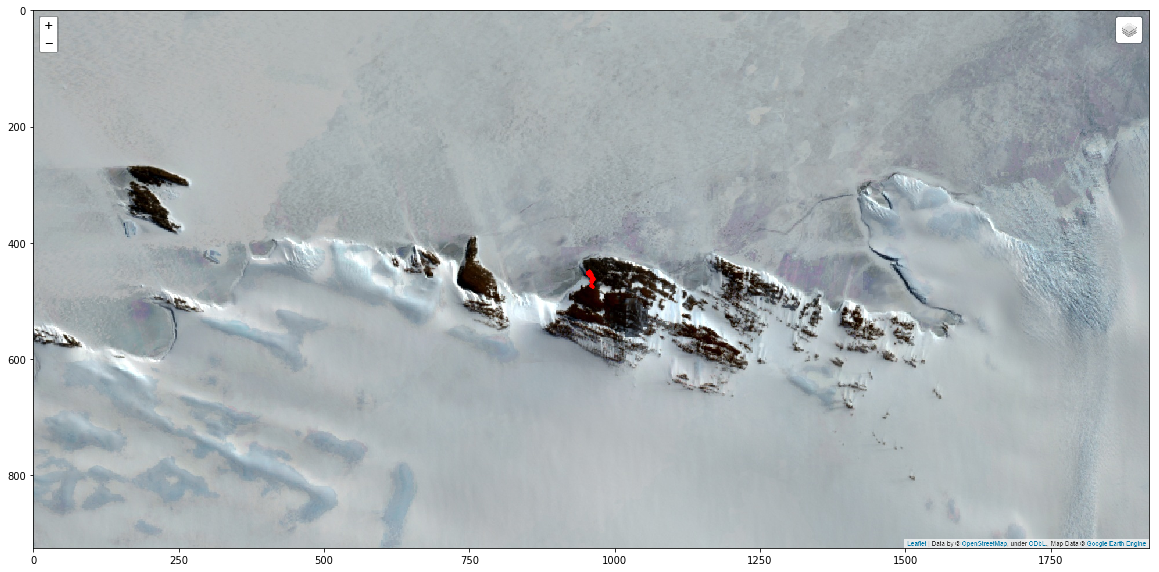

In [71]:
from matplotlib.colors import NoNorm
plt.figure(figsize=(20,10))
temp = cv2.imread(X[2],cv2.IMREAD_UNCHANGED)
temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
plt.imshow(temp,cmap=None,norm=NoNorm())

In [72]:
temp1 = cv2.cvtColor(temp,cv2.COLOR_RGB2HSV)

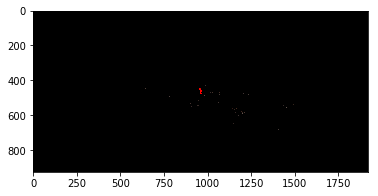

In [74]:
# lower mask (0-10)
lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])
mask0 = cv2.inRange(temp1, lower_red, upper_red)

# upper mask (170-180)
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
mask1 = cv2.inRange(temp1, lower_red, upper_red)

# join my masks
mask = mask0+mask1

output_img = temp.copy()
output_img[np.where(mask==0)] = 0

# plt.figure(figsize=(20,10))
# output_img = cv2.COLOR_HSV2RGB(output_img)
plt.imshow(output_img,cmap=None,norm=NoNorm())

In [86]:
x = [ cv2.imread(name,cv2.IMREAD_UNCHANGED) for name in X ]
# cv2.imread(X)
y = [ cv2.imread(name,cv2.IMREAD_UNCHANGED) for name in Y ]

x = [ cv2.cvtColor(name,cv2.COLOR_BGR2RGB) for name in x ]
# cv2.imread(X)
y = [ cv2.cvtColor(name,cv2.COLOR_BGR2RGB) for name in y ]

y1 = []
for name in y:
    temp1 = cv2.cvtColor(name,cv2.COLOR_RGB2HSV)
    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(temp1, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(temp1, lower_red, upper_red)

    # join my masks
    mask = mask0+mask1

    output_img = name.copy()
    output_img[np.where(mask==0)] = 0
    
#     name = output_img
    y1.append(output_img)

x = [ cv2.resize(name,(256,256)) for name in x]
y = [ cv2.resize(name,(256,256)) for name in y1]

x = [ cv2.cvtColor(name, cv2.COLOR_BGR2GRAY) for name in x ]
y = [ cv2.cvtColor(name, cv2.COLOR_BGR2GRAY) for name in y ]

x = [ np.expand_dims(name,axis=-1) for name in x]
y = [ np.expand_dims(name,axis=-1) for name in y]

In [87]:
y[0].shape

(256, 256, 1)

In [88]:
test_length = 5
x_train = x[:-5]
y_train = y[:-5]

x_test = x[-5:]
y_test = y[-5:]

In [89]:
len(x), len(y), len(x_train),len(y_train), len(x_test), len(y_test), 

(19, 19, 14, 14, 5, 5)

TRAIN: [ 4  5  6  7  8  9 10 11 12 13] VALIDATION: [0 1 2 3]
10
Epoch 1/1
3/3 [==============================] - 14s 5s/step - loss: 14.3972 - acc: 4.5776e-05
Epoch 1/1
3/3 [==============================] - 3s 875ms/step - loss: 15.8857 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 753ms/step - loss: 15.6892 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 599ms/step - loss: 15.9409 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 643ms/step - loss: 15.8013 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 643ms/step - loss: 12.6762 - acc: 1.8311e-04
Epoch 1/1
3/3 [==============================] - 2s 695ms/step - loss: 15.9339 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 576ms/step - loss: 15.7373 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 559ms/step - loss: 15.9422 - acc: 0.0000e+00
Epoch 1/1
3/3 [==============================] - 2s 562ms/step - 

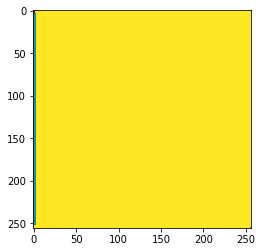

In [91]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
for train_index, val_index in kf.split(x_train):
    print("TRAIN:", train_index, "VALIDATION:", val_index)
    X_train = tf.convert_to_tensor(np.asarray([x[i] for i in train_index],dtype=np.float32))
    X_test = tf.convert_to_tensor(np.asarray([x[i] for i in val_index],dtype=np.float32))
    print(X_train.shape[0])
    
    Y_train = tf.convert_to_tensor(np.asarray([y[i] for i in train_index],dtype=np.float32))
    Y_test = tf.convert_to_tensor(np.asarray([y[i] for i in val_index],dtype=np.float32))
    
    for i in range(0,X_train.shape[0]):
        model.fit(X_train[i:i+1],Y_train[i:i+1],steps_per_epoch=3)
        
    Y_pred = model.predict(X_test, steps=3)
    print(Y_pred[0].shape)
    plt.imshow(Y_pred[0].reshape(256,256),cmap='gray')
    
    tf.c

#     X_train, X_test = x[train_index], x[val_index]
#     y_train, y_test = y[train_index], y[test_index]

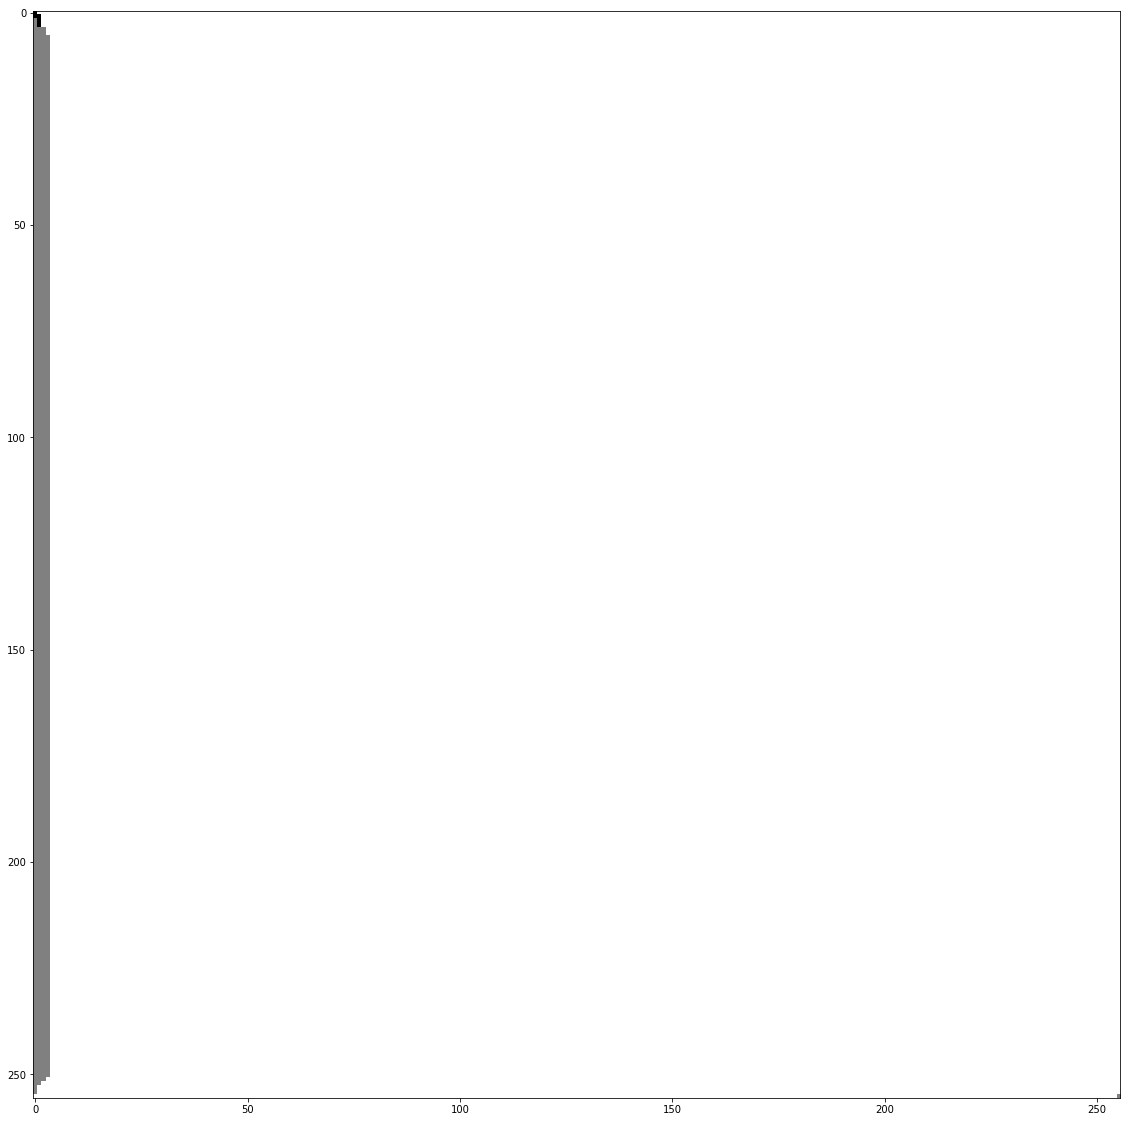

In [96]:
plt.figure(figsize=(20,20))
plt.imshow(Y_pred[0].reshape(256,256),cmap='gray')

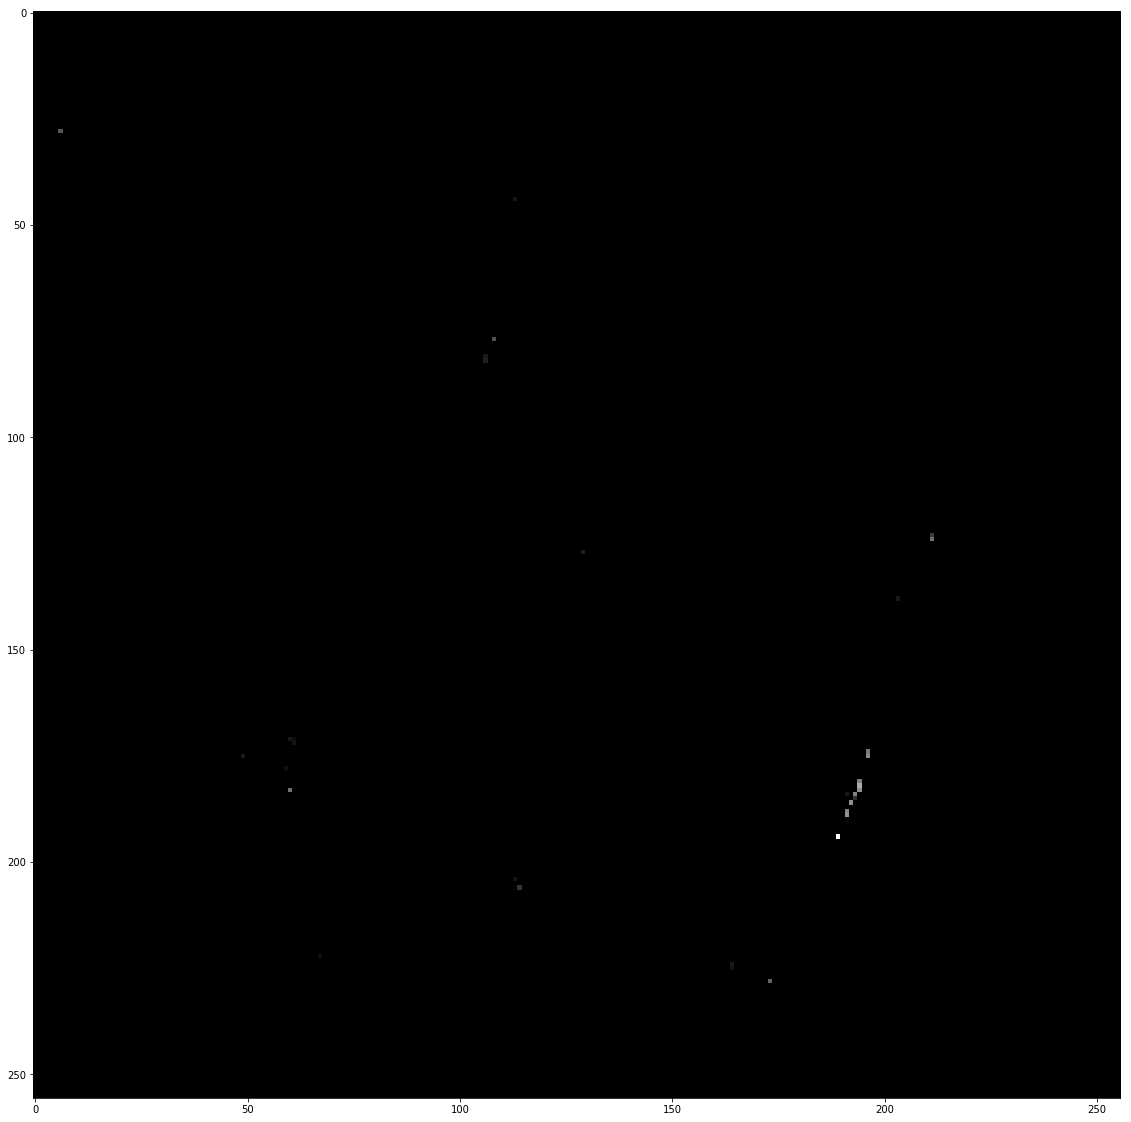

In [94]:
plt.figure(figsize=(20,20))
plt.imshow(y[3].reshape(256,256),cmap='gray')

In [107]:
tf.convert_to_tensor( np.asarray(X_test, dtype=np.float32) )

<tf.Tensor 'Const_3:0' shape=(3, 256, 256) dtype=float32>

In [50]:
x[0].shape

(925, 1920, 3)

In [73]:
resized = cv2.resize(x[0], (256,256), interpolation = cv2.INTER_AREA)

In [74]:
resized.shape

(256, 256, 3)

In [75]:
rgray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
rgray.shape

(256, 256)

In [81]:
check = x[0][:, :, 0]
check.shape

(925, 1920)

In [82]:
check2 = np.expand_dims(check, axis=-1)
check2.shape

(925, 1920, 1)

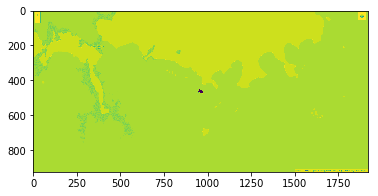

In [83]:
plt.imshow(check)

TypeError: Invalid dimensions for image data

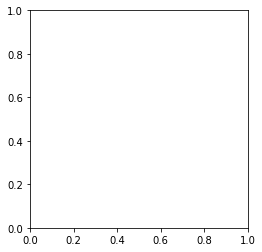

In [84]:
plt.imshow(check2)

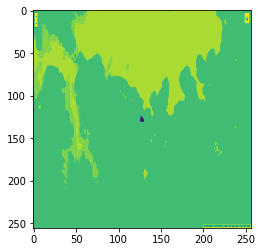

In [76]:
plt.imshow(rgray)

In [77]:
import numpy as np
rnew = np.expand_dims(rgray,axis=-1)
rnew.shape

(256, 256, 1)

TypeError: Invalid dimensions for image data

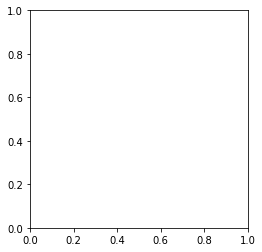

In [78]:
plt.imshow(rnew)

In [89]:
rnew = np.expand_dims(rnew, axis=0)

In [91]:
rnew = tf.convert_to_tensor(rnew, dtype=tf.float32)

In [128]:
Y_train.shape

TensorShape([Dimension(11), Dimension(256), Dimension(256), Dimension(1)])

In [126]:
out = model(X_train)

In [134]:
import keras
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [133]:
?keras.optimizers.RMSprop

In [137]:
model.fit(X_train[0:3],Y_train[0:3],steps_per_epoch=3)

Epoch 1/1
3/3 [==============================] - 5s 2s/step - loss: 34674.5352 - mean_squared_error: 34674.5482
